# Exploration FordGo Bike
#### by Felipe Gonçalves


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assessing">Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
</ul>

# <a id='intro'></a>
## Introduction

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels)

In this project, I will perform an Exploratory and Explanatory analysis in the public bicycle sharing system dataset. This dataset contain 2,506,983 entries for each bicycle trip that happened in 2019 at San Francisco. [Original Data](https://www.lyft.com/bikes/bay-wheels/system-data)

The dataset has the following collumns:

    > bike_id
    > bike_share_for_all_trip
    > duration_sec
    > end_station_id
    > end_station_latitude
    > end_station_longitude
    > end_station_name
    > end_time
    > rental_access_method
    > start_station_id
    > start_station_latitude
    > start_station_longitude
    > start_station_name
    > start_time
    > user_type


In [1]:
# Importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# <a id='gathering'></a>
## Gathering data

In [2]:
# Isolating and addressing the csv files
raw_data = ["Data/201901-fordgobike-tripdata.csv",
            "Data/201902-fordgobike-tripdata.csv",
            "Data/201903-fordgobike-tripdata.csv",
            "Data/201904-fordgobike-tripdata.csv",
            "Data/201905-baywheels-tripdata.csv",
            "Data/201906-baywheels-tripdata.csv",
            "Data/201907-baywheels-tripdata.csv",
            "Data/201908-baywheels-tripdata.csv",
            "Data/201909-baywheels-tripdata.csv",
            "Data/201910-baywheels-tripdata.csv",
            "Data/201911-baywheels-tripdata.csv",
            "Data/201912-baywheels-tripdata.csv"]

In [3]:
# Reading and concatenating all the csv files
bike_df = pd.concat((pd.read_csv(f, low_memory = False) for f in raw_data), ignore_index = True, sort = True)

# <a id='assessing'></a>
## Assessing data

In [4]:
bike_df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [5]:
bike_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null int64
bike_share_for_all_trip    2386145 non-null object
duration_sec               2506983 non-null int64
end_station_id             2424081 non-null float64
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null object
rental_access_method       120838 non-null object
start_station_id           2426249 non-null float64
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null object
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
# Checking all the columns types
for col in bike_df:
    print (type(bike_df[col][1]))

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
# Checking all uniques values in bike_share_for_all_trip column
bike_df.bike_share_for_all_trip.unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
# Checking all uniques values in user_type column
bike_df.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [9]:
# Checking all uniques values in rental_access_method column
bike_df.rental_access_method.unique()

array([nan, 'app', 'clipper'], dtype=object)

In [10]:
# Analysing the dataset brief statistic
bike_df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [11]:
# Looking for duplicates
bike_df.duplicated().sum()

0

In [12]:
# Detecting missing values
bike_df.isnull().sum()

bike_id                          0
bike_share_for_all_trip     120838
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

### Quality Issues

- Incorrect data type.
end_time, start_time should be datetime;

- Incorrect data type.
user_type, bike_share_for_all_trip should be set to category data type;

- Incorrect data type. 
bike_id, start_station_id, end_station_id should be string data type;

- New columns.
To deepen the data analyse, let's create new columns hour of the day, day, day of the week, month, duration in minutes;

- Strange data.
The max value of duration_sec recorded is 912110 seconds. This is an error or a system test record. Let's delete this record.

- Missing data.
Too many missing data in rental_access_method column. Considering the total of entries: 2,506,983 entries, 2,386,145 of them are null objects (95,18%). Let's drop this column.

# <a id='cleaning'></a>
## Cleaning data

In [13]:
# Creating a copy of original dataframe
df = bike_df.copy()

### Define
Incorrect data type. The columns end_time, start_time should be datetime;

In [14]:
type(df["end_time"][0]), type(df["start_time"][0])

(str, str)

### Code

In [15]:
# Setting end_time and start_time columns to datetime
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])

### Test

In [16]:
type(df["end_time"][0]), type(df["start_time"][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

------------------

### Define
Incorrect data type. The columns user_type, bike_share_for_all_trip should be set to category data type;

### Code

In [17]:
# Setting user_type, bike_share_for_all_trip columns to category data type
df["user_type"] = df["user_type"].astype("category")
df["bike_share_for_all_trip"] = df["bike_share_for_all_trip"].astype("category")

### Test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 253.4+ MB


-------------------

### Define
Incorrect data type. The columns bike_id, start_station_id, end_station_id should be string data type;

### Code

In [19]:
# Setting bike_id, start_station_id, end_station_id columns to string data type
df["bike_id"] = df["bike_id"].astype(str)
df["start_station_id"] = df["start_station_id"].astype(str)
df["end_station_id"] = df["end_station_id"].astype(str)

### Test

In [20]:
type(df["bike_id"][0]), type(df["start_station_id"][0]), type(df["end_station_id"][0])

(str, str, str)

-------------------------

### Define
Creating new columns. To deepen the data analyse, let's create new columns hour of the day, day, day of the week, month, duration in minutes;

### Code

In [21]:
# Creating start_time_hour column from start_time
df["start_time_hour"] = df["start_time"].dt.hour

In [22]:
# Creating start_time_day column from start_time
df["start_time_day"] = df["start_time"].dt.day

In [23]:
# Creating start_time_weekday column from start_time
df["start_time_weekday"] = df["start_time"].dt.strftime("%a")

In [24]:
# Creating start_time_month column from start_time
df["start_time_month"] = df["start_time"].dt.strftime("%b")

In [25]:
# Creating duration_min column from duration_sec
df["duration_min"] = df["duration_sec"] / 60

### Test

In [27]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 20 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2386145 non-null category
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null object
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
start_time_hour            2506983 non-null int64
start_time_day             2506983 non-null int64


---------------

### Define
Strange data. When we executed the describe() method, we can see the max value in duration_sec is 912,110 seconds or 15,201.8 minutes. This is an error or a system test record. Let's delete this record.

In [28]:
df["duration_sec"].max(), df["duration_min"].max()

(912110, 15201.833333333334)

A day have 1440 minutes. Let's see how many records go beyond.

In [29]:
df.loc[df["duration_min"] > 1440]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_weekday,start_time_month,duration_min
2481276,614329,NaN,912110,nan,37.327656,-121.868598,NaN,2019-12-30 12:37:26,app,nan,37.323757,-121.878614,NaN,2019-12-19 23:15:36,Customer,23,19,Thu,Dec,15201.833333


### Code

In [30]:
# Dropping the record that have index = 2481276
df.drop(df.index[2481276], inplace = True)

### Test

In [31]:
df.loc[df["duration_sec"] == 912110]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_weekday,start_time_month,duration_min


------------

### Define
Missing data. Too many missing data in rental_access_method column. Considering the total of entries: 2,506,983 entries, 2,386,145 of them are null objects (95,18%). Let's drop this column.

### Code

In [32]:
# Dropping the rental_access_method column
# Note: axis=1 denotes that we are referring to a column, not a row
df = df.drop("rental_access_method", axis = 1)

### Test

In [33]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 19 columns):
bike_id                    2506982 non-null object
bike_share_for_all_trip    2386145 non-null category
duration_sec               2506982 non-null int64
end_station_id             2506982 non-null object
end_station_latitude       2506982 non-null float64
end_station_longitude      2506982 non-null float64
end_station_name           2424633 non-null object
end_time                   2506982 non-null datetime64[ns]
start_station_id           2506982 non-null object
start_station_latitude     2506982 non-null float64
start_station_longitude    2506982 non-null float64
start_station_name         2426850 non-null object
start_time                 2506982 non-null datetime64[ns]
user_type                  2506982 non-null category
start_time_hour            2506982 non-null int64
start_time_day             2506982 non-null int64
start_time_weekday         2506982 non-null object

In [34]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_time_hour,start_time_day,start_time_weekday,start_time_month,duration_min
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,17,31,Thu,Jan,1347.083333
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,20,31,Thu,Jan,1098.333333
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,18,31,Thu,Jan,1043.883333
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,19,31,Thu,Jan,744.666667
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,14,31,Thu,Jan,1011.816667


------------------

### What is the structure of your dataset?
This dataset contains 2,506,982 entries for each bicycle trip that happened in 2019 at San Francisco.
The dataset originally has 15 columns that are mostly numeric variables. I created more 5 columns and dropped one. The final dataset have 19 columns, they are:
 - bike_id
 - bike_share_for_all_trip
 - duration_sec
 - end_station_id
 - end_station_latitude
 - end_station_longitude
 - end_station_name
 - end_time
 - start_station_id
 - start_station_latitude
 - start_station_longitude
 - start_station_name
 - start_time
 - user_type
 - start_time_hour
 - start_time_day
 - start_time_weekday
 - start_time_month
 - duration_min

### What is/are the main feature(s) of interest in your dataset?
I am interested in figuring out the following points:
 - The counting of bike trips during the year; 
 - The average trip duration;
 - The time of the day, the day of the week, the month of the year that concentrate the most bicycle trips;
 - The user type influences the duration of the trip and the day of the trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The columns start_time, duration_sec, user_type, bike_id should help in data analysis. As well as the new columns created from them start_time_hour, start_time_day, start_time_weekday, start_time_month, duration_min.

# <a id='univariate'></a>
## Univariate Exploration

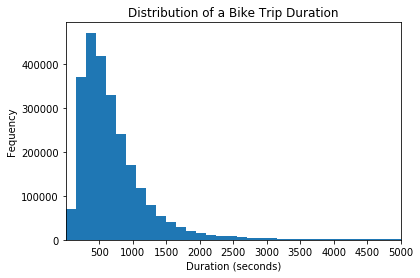

In [35]:
bin_edges = np.arange(0, df["duration_sec"].max() + 150 , 150)
plt.hist(data = df , x = "duration_sec", bins = bin_edges)
plt.title("Distribution of a Bike Trip Duration")
tick_locs = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.xticks(tick_locs, tick_locs)
plt.xlim(0,5000)
plt.xlabel("Duration (seconds)")
plt.ylabel("Fequency");

We can see that the duration_sec histogram is skewed right, with a peak in 500 seconds. Through this graph we can interpret that the bike trips are mostly short duration. This curve only appears as a result of xlim tool, making it possible to set limits on the x axis. The highly skewed data with a very long tail with large values suggest to us that apply the logarithmic transform could be a good ideia.

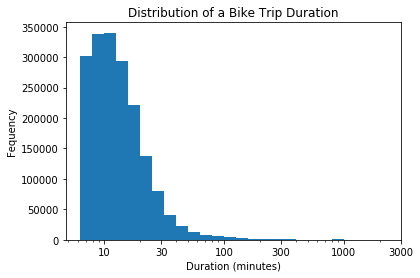

In [36]:
bin_edges = 10 ** np.arange(0.8, np.log10(df["duration_min"].max()) + 0.1, 0.1)
plt.hist(data = df , x = "duration_min", bins = bin_edges)
plt.xscale('log')
plt.title("Distribution of a Bike Trip Duration")
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel("Duration (minutes)")
plt.ylabel("Fequency");

After applying the log transformation with xscale tool, and set the specific ticks with xticks we can confirm that the most part of trips have 10 minuts. The duration_min histogram now follow the normal distribution.

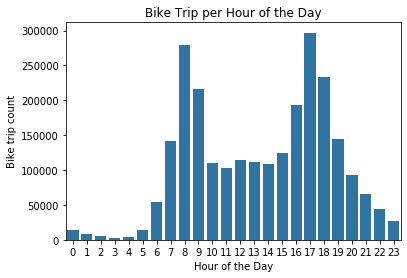

In [37]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = "start_time_hour", color = base_color)
plt.title("Bike Trip per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Bike trip count");

The hours of the day that have more bike trips is 8 and 17 hours. Revealing that the most trips happens in the way to work or to school by morning 8 o’clock and during the return to home 17 o’clock.

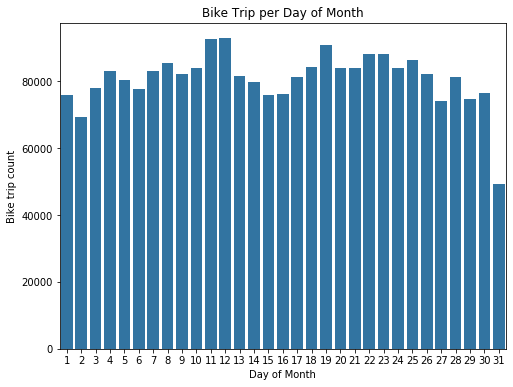

In [38]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = "start_time_day", color = base_color)
plt.title("Bike Trip per Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Bike trip count");

The days 12 and 11 are the days of month with the most bike trips.

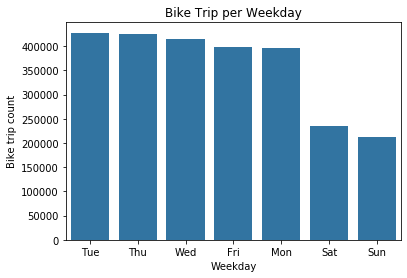

In [39]:
base_color = sb.color_palette()[0]
cat_order = df["start_time_weekday"].value_counts().index
sb.countplot(data = df, x = "start_time_weekday", color = base_color, order = cat_order)
plt.title("Bike Trip per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Bike trip count");

Tuesday is the weekday with more bike trips, followed by Thursday, Wednesday, Friday, Monday, Saturday and Sunday. Again revealing that users use bicycles daily to go to work or to school as a mean of transport and not for entertainment. Weekend trips have the lowest numbers.

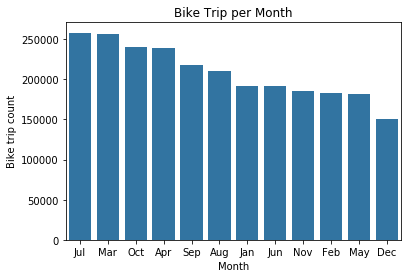

In [40]:
base_color = sb.color_palette()[0]
cat_order = df["start_time_month"].value_counts().index
sb.countplot(data = df, x = "start_time_month", color = base_color, order = cat_order)
plt.title("Bike Trip per Month")
plt.xlabel("Month")
plt.ylabel("Bike trip count");

July is the month of the year that have the most of bike trips, the last month is December. In this case, we can interpret that the weather and the temperature of the day influence bicycle trips. In winter, travel decreases, registering the valley of the curve in December. In summer, on the other hand, we have the peak usage registered in July.

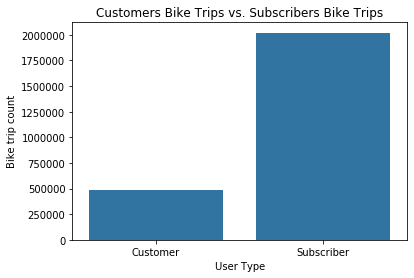

In [41]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = "user_type", color = base_color)
plt.title("Customers Bike Trips vs. Subscribers Bike Trips")
plt.xlabel("User Type")
plt.ylabel("Bike trip count");

The Subscribers are the most users of the public bicycle sharing system.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The maximum value recorded in the duration_sec column was 912,110 seconds or 15,201.8 minutes (index = 2481276). Considering that a day has a total of 1,440 minutes this is really strange point.
The log transformation was applied in duration_min column to discover the normal distribution curve with the peak in 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The strange point, described above (duration_sec = 912,110, duration_min = 15,201.8, index = 2481276) was deleted.

# <a id='bivariate'></a>
## Bivariate Exploration

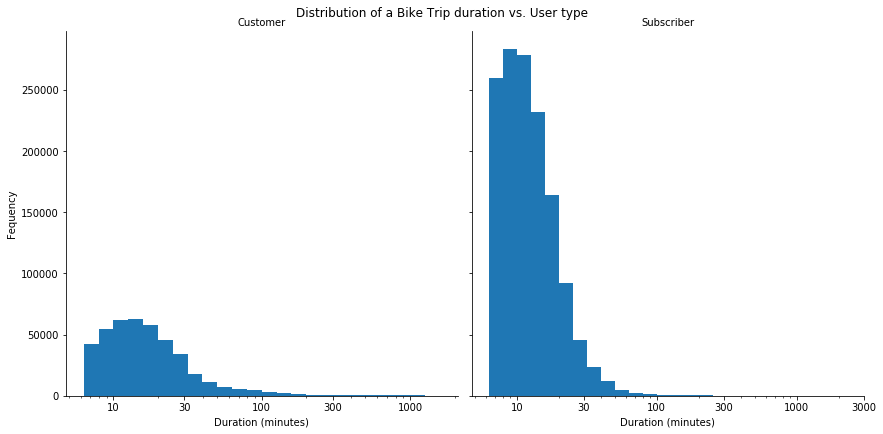

In [42]:
bin_edges = 10 ** np.arange(0.8, np.log10(df["duration_min"].max()) + 0.1, 0.1)
g = sb.FacetGrid(data = df, col = "user_type", height = 6)
g.map(plt.hist, "duration_min", bins = bin_edges)
g.fig.suptitle("Distribution of a Bike Trip duration vs. User type", y = 1.00)
g.set_axis_labels("Duration (minutes)", "Fequency")
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}');

Customer user type has a lower frequency in Bike trips when we compare with Subscriber user type, however, the duration of the trips is higher in Customer group. The Customer peak is shifted to the right of the 10 minutes, while the Subscriber peak is located in 10 minutes.

In [43]:
df.groupby("user_type")["duration_min"].mean()

user_type
Customer      22.546204
Subscriber    11.269486
Name: duration_min, dtype: float64

We can see accurately that the average travel duration corresponds to 22.55 minutes for the Customer user type and 11.27 minutes for the Subscriber user type.

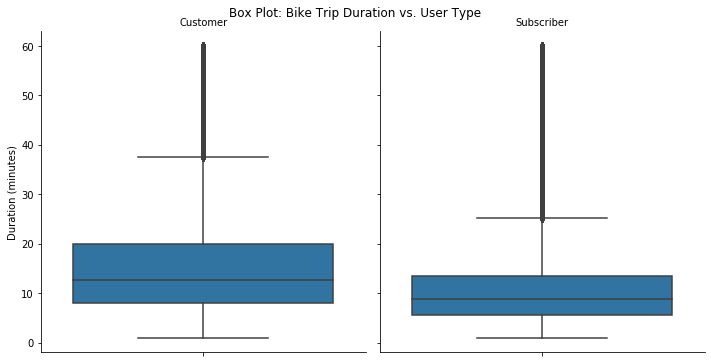

In [44]:
base_color = sb.color_palette()[0]
df2 = df.loc[df["duration_min"] < 60]
g = sb.catplot(data = df2, y = "duration_min", col = "user_type", 
                kind = "box", color = base_color)
g.fig.suptitle("Box Plot: Bike Trip Duration vs. User Type", y = 1)
g.set_axis_labels("", "Duration (minutes)")
g.set_titles("{col_name}");

The box plot help us to confirm that the Customer bike trips is longer than Subscriber bike trips. We can see that the Customer median line is above the Subscriber median line.
It was necessary to filter the trips that last less than 1 hour duration in order not to deform the graph, as there is a reduced number of trips lasting more than 60 minutes that extends the Q4 of the box plot upwards.

In [45]:
df.groupby("user_type")["duration_min"].median()

user_type
Customer      13.283333
Subscriber     8.850000
Name: duration_min, dtype: float64

We can see accurately that the median travel duration corresponds to 13.28 minutes for the customer profile and 8.85 minutes for the Subscriber profile.

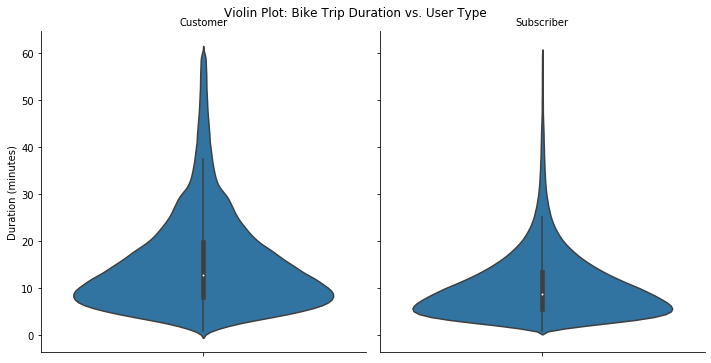

In [46]:
base_color = sb.color_palette()[0]

g = sb.catplot(data = df2, y = "duration_min", col = "user_type", 
                kind = "violin", color = base_color)
g.fig.suptitle("Violin Plot: Bike Trip Duration vs. User Type", y = 1)
g.set_axis_labels("", "Duration (minutes)")
g.set_titles("{col_name}");

The violin plot is another way to visualizate the data and ensure that duration of Customer bike trips is longer than Subscriber bike trips. I kept the filter used in the box plot (trips under 60 minutes duration).

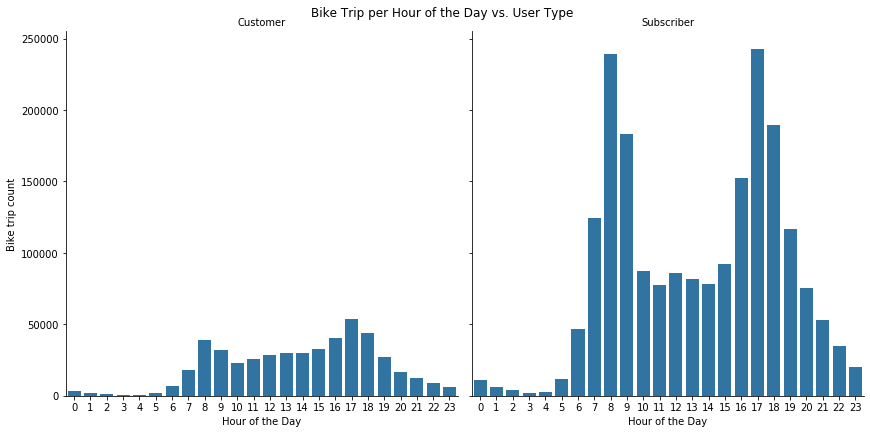

In [47]:
base_color = sb.color_palette()[0]

g = sb.catplot(data = df, x = "start_time_hour", col = "user_type", height = 6, 
               kind = "count", color = base_color, sharey = True)
g.fig.suptitle("Bike Trip per Hour of the Day vs. User Type", y = 1)
g.set_axis_labels("Hour of the Day", "Bike trip count")
g.set_titles("{col_name}");

The Customer has a smaller count when we compare to Subscriber hourly bike trips count, but the peak in both user types is similar in hour 8 and hour 17. The hour 18 appears strong in Customer profile too. I kept the scale of the y-axis common to the two graphs with the tool sharey = True.

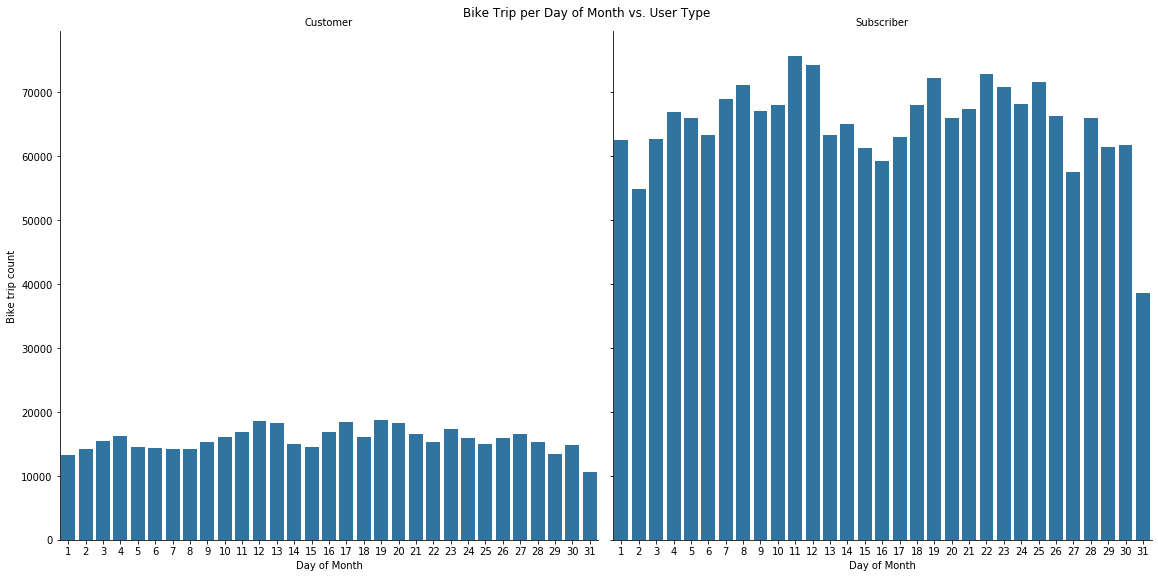

In [48]:
base_color = sb.color_palette()[0]

g = sb.catplot(data = df, x = "start_time_day", col = "user_type", height = 8, 
               kind = "count", color = base_color, sharey = True)
g.fig.suptitle("Bike Trip per Day of Month vs. User Type", y = 1)
g.set_axis_labels("Day of Month", "Bike trip count")
g.set_titles("{col_name}");

The Customer has a smaller count when we compare to Subscriber day of month bike trips count.  
The days 11 and 12 are the days of month with the most bike trips in Subscriber profile.
In the Customer profile, the days 11, 12, 19 and 20 are the days of month with the most bike trips.
I kept the scale of the y-axis common to the two graphs with the tool sharey = True.

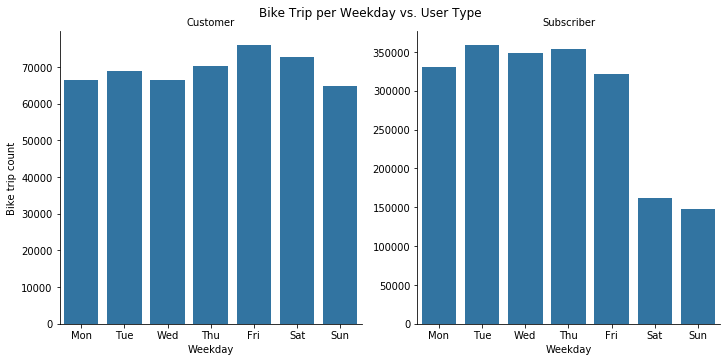

In [49]:
base_color = sb.color_palette()[0]
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
g = sb.catplot(data = df, x = "start_time_weekday", col = "user_type", 
               kind = "count", sharey = False, color = base_color, order = order)
g.fig.suptitle("Bike Trip per Weekday vs. User Type", y = 1)
g.set_axis_labels("Weekday", "Bike trip count")
g.set_titles("{col_name}");

The Customer user type has more bike trips count in Friday and Saturday than other day in a week. The Subscriber user type has more bike trips recorded in Tuesday, Thursday and Wedesnday. 

It is worth noting that the scales of the two graphs are not the same (sharey = False). The Customer peak is around 70,000 bike trips  while the Subscriber peak is around 350,000.

We can interpret that the Subscriber user type  uses bicycles during the week days to go to work / school. While the Customer user type concentrates more use during the weekend, directed to entertainment.

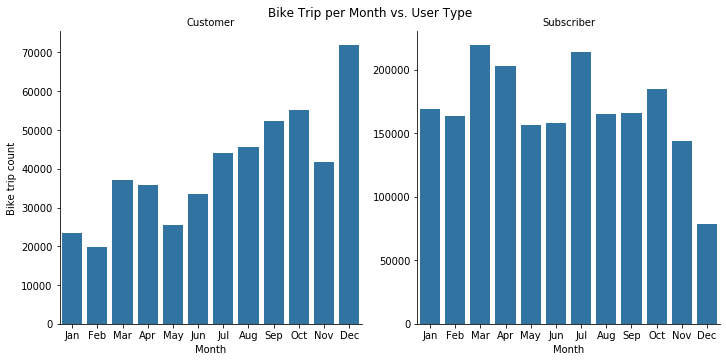

In [50]:
base_color = sb.color_palette()[0]
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
g = sb.catplot(data = df, x = "start_time_month", col = "user_type", 
               kind = "count", sharey = False, color = base_color, order = order)
g.fig.suptitle("Bike Trip per Month vs. User Type", y = 1)
g.set_axis_labels("Month", "Bike trip count")
g.set_titles("{col_name}");

The Customer user type has more bike trips count in December. The Subscriber user type has more bike trips recorded in March. 

This confirm the last interpretation that the Subscriber user type uses bicycles daily to go to work / school, while the Customer user type uses bike directed to entertainment, turism. Subscriber is a permanent member, Customer is only a casual.

The scales are different in both graphs, I kept the sharey = False. The Customer peak is around 70,000 bike trips  while the Subscriber peak is around 200,000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When we include the user_type in data analysis we start to understand the user behavior.

Customer user type has a lower frequency in Bike trips when we compare with Subscriber user type, however, the average of trips duration is higher in Customer group. 22.55 minutes for the Customer against 11.27 minutes for the Subscriber.

The Customer has a smaller count when we compare to Subscriber hourly bike trips count, but the peak in both user types is similar in hour 8 and hour 17.

The Customer user type has more bike trips count in Friday and Saturday than other day in a week. The Subscriber user type has more bike trips recorded in Tuesday, Thursday and Wedesnday. 

The Customer user type has more bike trips count in December. The Subscriber user type has more bike trips recorded in March. 

The Subscriber user type uses bicycles daily to go to work / school, while the Customer user type uses bike directed to entertainment, turism. Subscriber is a permanent member, Customer is only a casual.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I did not observe any correlation that is out of features of interest.

# <a id='multivariate'></a>
## Multivariate Exploration

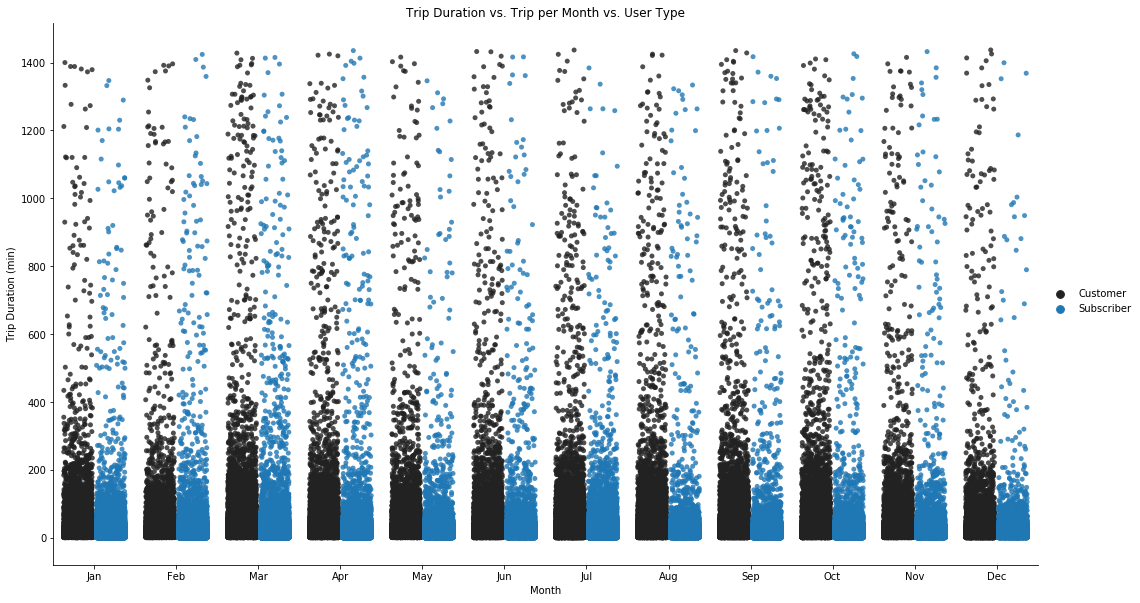

In [52]:
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
g.map(sb.stripplot, "start_time_month", "duration_min", "user_type", 
      jitter = 0.35, dodge = True, alpha = 0.8, order = order)
g.add_legend()
plt.title("Trip Duration vs. Trip per Month vs. User Type")
plt.xlabel("Month")
plt.ylabel("Trip Duration (min)");

When we plot Trip Duration, Trip per Month and User Type we can see the Subscriber user type predominance in March and July, while the Customer user type is stronger in December. The longest bike trips appears with Customer user type in 8 months(January, March, May, June, July, August, September and Decembre ). Subscriber user type has the longest trips in 4 months (February, April, October and November). The Subscriber user type concentrates the shortest trips in all months.

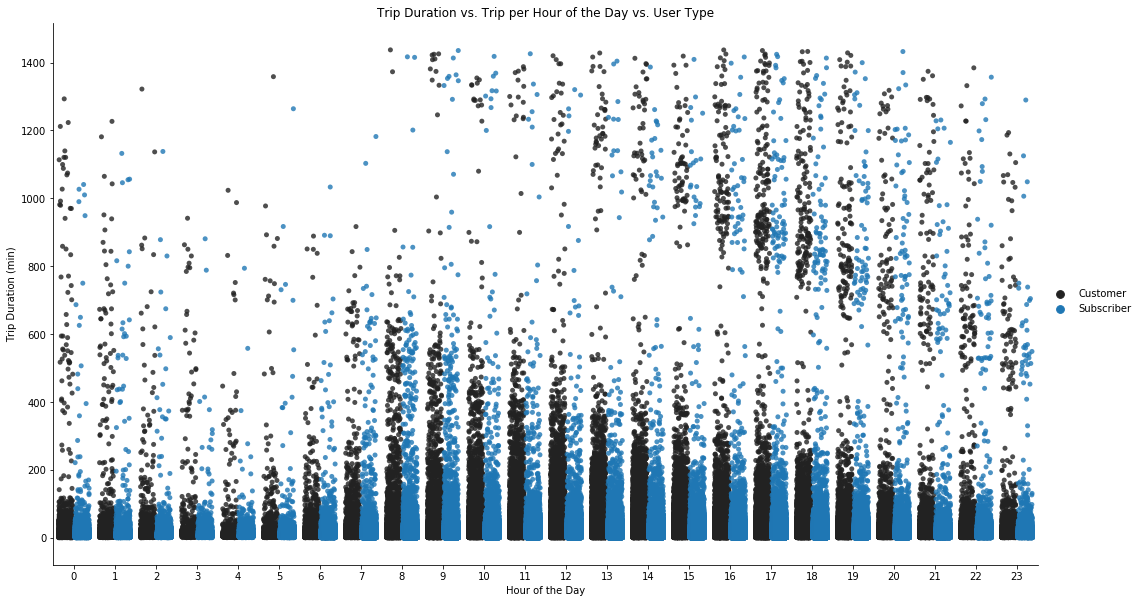

In [53]:
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
g.map(sb.stripplot, "start_time_hour", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title("Trip Duration vs. Trip per Hour of the Day vs. User Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Duration (min)");

Although hour 8 and hour 17 have the peak of use, the longest trips happened between hour 16 and hour 19 of the day. 
The Subscriber user type appears again with the shortest bike trips, while the Customer has the longest trips.

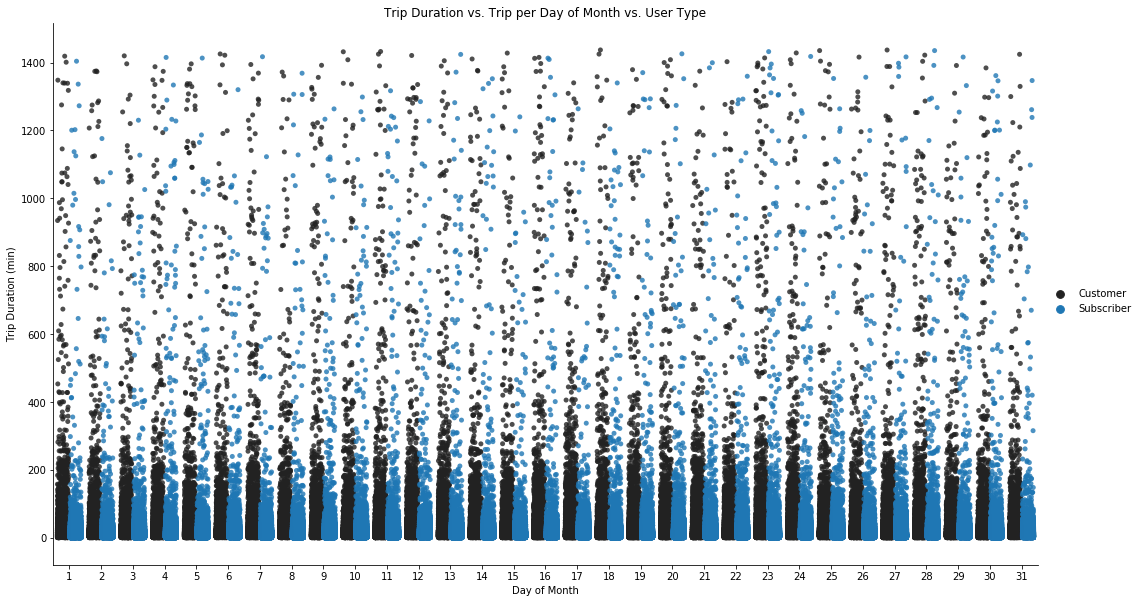

In [54]:
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
g.map(sb.stripplot, "start_time_day", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title("Trip Duration vs. Trip per Day of Month vs. User Type")
plt.xlabel("Day of Month")
plt.ylabel("Trip Duration (min)");

This graph shows that the Subscriber bike trips stay short over the days, while the Customer bike trips are longer almost in every days.

In [55]:
# Setting the correct weekday order
df["start_time_weekday"] = pd.Categorical(df["start_time_weekday"], 
                                          categories = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], 
                                          ordered = True)

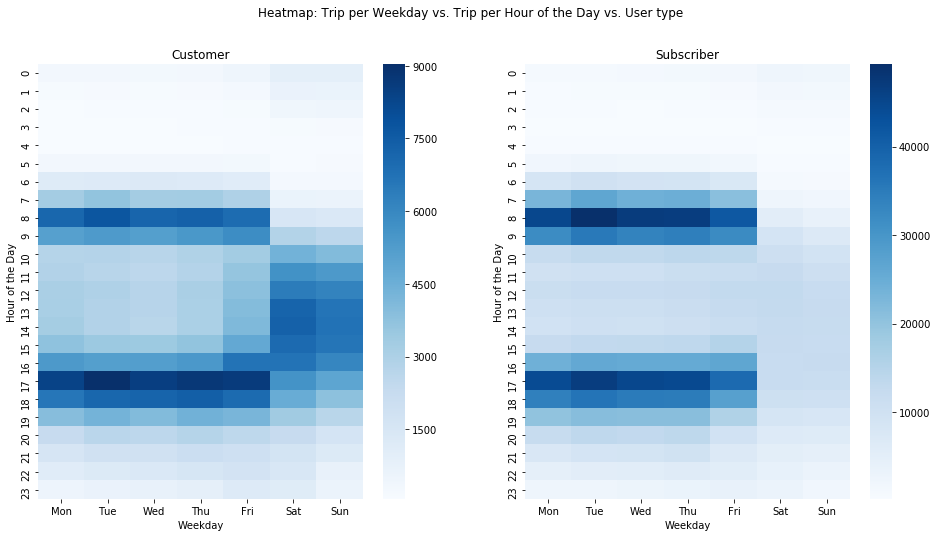

In [56]:
plt.figure(figsize = (16,8))
plt.suptitle('Heatmap: Trip per Weekday vs. Trip per Hour of the Day vs. User type')

plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap = "Blues")
plt.title("Customer")
plt.xlabel("Weekday")
plt.ylabel("Hour of the Day");

plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap = "Blues")
plt.title("Subscriber")
plt.xlabel("Weekday")
plt.ylabel("Hour of the Day");

Analyzing the behavior of the Customer user type, we can see that the most bike trips happen in hour 17, hour 18 and hour 8 during the weekdays. In the weekend, the hour with the peak of bike trips is 14 o'clock in Saturday and between hour 13 and hour 15 in Sunday. The Subscriber user type uses the bike during the weekdays with the peak recorded in hour 8 and hour 17. Although the weekend shows low utilization, the Subscriber scale of bike trips is different than Customer scale. The lower value in Subscriber scale (10,000) is higher than the top value in Customer scale (9,000).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When we include a third variable, the insight become more complete.
Plotting the scatterplot of Trip Duration vs. Trip per Month vs. User Type we can see the Subscriber user type predominance in March and July, while the Customer user type is stronger in December. The longest bike trips appears with Customer user type in 8 months(January, March, May, June, July, August, September and Decembre ). Subscriber user type has the longest trips in 4 months (February, April, October and November). The Subscriber user type concentrates the shortest trips in all months.

Although hour 8 and hour 17 have the peak of use, the longest trips happened between hour 16 and hour 19 of the day. 
The Subscriber user type appears again with the shortest bike trips, while the Customer has the longest trips.

We can see in Heatmap that the most bike trips happen in hour 17, hour 18 and hour 8 during the weekdays. In the weekend, the hour with the peak of bike trips is 14 o'clock in Saturday and between hour 13 and hour 15 in Sunday. The Subscriber user type uses the bike during the weekdays with the peak recorded in hour 8 and hour 17. Although the weekend shows low utilization, the Subscriber scale of bike trips is different than Customer scale. The lower value in Subscriber scale (10,000) is higher than the top value in Customer scale (9,000).

### Were there any interesting or surprising interactions between features?

The user type show an interesting behavior of bike trips, varying according to the day of the week, the time of day, the month of the year as well as the duration and the count of trips.

In [55]:
# Storing the final dataframe df as a comma-separated values (csv) file named bike_df_master.csv
df.to_csv("bike_df_master.csv", index = False, encoding = "utf-8")